# Import Modules

In [4]:
from Dataload import dataload

from module import transformer,video_model,invres

import torch
import torch.nn as nn
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from torchvision import  utils
from constant import EMOTIPATH
from src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
from torchvision import transforms
import os

In [5]:
print (os.path.splitext('/home/user/somefile.txt')[0]+'.jpg')

/home/user/somefile.jpg


# Test Image #1

In [13]:

Train_label=os.path.join(EMOTIPATH,"Train_labels.txt")
Train_video=os.path.join(EMOTIPATH,"Train")
Val_labels=os.path.join(EMOTIPATH,"Val_labels.txt")
Val_video=os.path.join(EMOTIPATH,"Val")


In [14]:
def face_extraction(img,max_number):
        def toonePIL(x,max_number):
            new_im = Image.new('RGB', (64*max_number,64))

            x_offset = 0
            for im in x:
                new_im.paste(im, (x_offset,0))
                x_offset += im.size[0]
            return new_im

        bounding_boxes, landmarks = detect_faces(img)
        img_list=[]
        transform=transforms.Resize((64,64))
        transform2=transforms.Compose([
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
        for box_index,(left,right,up,bottom,_) in enumerate(bounding_boxes):
            cropped_img=img.crop((left,right,up,bottom))
            img_list.append(transform(cropped_img))
            
            if len(img_list)==max_number:
                break
        while len(img_list) !=max_number:
            END_PAD= Image.new(mode = "RGB", size = (64, 64), color =(0, 0, 0))
            img_list.append(END_PAD)
        img=toonePIL(img_list,max_number)
        pt=transform2(img)
        return img,pt
    

In [15]:
import pandas as pd
class Raw_Data():
    def __init__(self,csv_file,sub_csv_file=None,
                 base_path_v=None,frame_num=25,embedding=False):
        
        self.max_frame_num=25
        self._table = pd.read_csv(csv_file,delimiter=' ')
        if sub_csv_file is None:
            self._table_embedding=None
        else:
            self._table_embedding=pd.read_csv(sub_csv_file)
        self.frame_num = frame_num
        self._base_path_v=base_path_v
        self.embedding=embedding
        self.transform=transforms.Compose([
                     transforms.Resize((256,256)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
        self.endPad=self.transform(Image.new(mode='RGB', size=(256,256), color=0))    

       
    def __len__(self):
        return len(self._table)

    def __getitem__(self, idx):
        folder_name = os.path.join(self._base_path_v,self._table.Vid_name[idx])
        first=True
            
        if self._table_embedding is not None:
            temp_frame_embedding=torch.from_numpy(np.array(self._table_embedding.Embedding[idx].split(),dtype=float)).reshape((self.max_frame_num,-1))
            frame_data=torch.empty(size=(self.frame_num,1000),dtype=torch.double)
            if self.frame_num<25:
                index=np.linspace(0,23,self.frame_num,dtype=int)
 
                for i,copy in enumerate(index):
                    frame_data[i]=temp_frame_embedding[copy]
            return (frame_data,audio_img,labels)
    

            
        frame_raw_list=os.listdir(folder_name)
        frame_len=len(frame_raw_list)

        frame_raw_list=sorted(frame_raw_list)
       # print(frame_raw_list)
        frame_list=[]
        
        if frame_len<self.frame_num:
            for index_0 in range(frame_len):
                frame_path=os.path.join(folder_name,frame_raw_list[index_0])               
                tempimg=Image.open(frame_path)       
                frame_list.append(self.transform(tempimg))
            
        else:    
            frame_index=(np.linspace(0,frame_len-1,self.frame_num,dtype=int))

            for index_2 in frame_index:
                frame_path=os.path.join(folder_name,frame_raw_list[index_2])
                tempimg=Image.open(frame_path)
                frame_list.append(self.transform(tempimg))
        while(len(frame_list)<self.frame_num):
            frame_list.append(self.endPad)
        frame_data=torch.stack(frame_list,dim=0)
            
        return (folder_name,frame_data,frame_raw_list)
    


In [35]:
#

for i in tqdm(train_data):
    video_name=os.path.basename(i[0])
    file_name=video_name+'.pt'
    save_path=os.path.join(EMOTIPATH,"pt","Train")
    if not os.path.isdir(save_path):
            os.mkdir(save_path)

    torch.save(i[1], os.path.join(save_path,file_name))



KeyError: 2661

In [34]:
valid_data[0][0]

'../../../hdd/Dataset/EmotiW/images/Val/1_1'

In [27]:
train_data=Raw_Data(Train_label,base_path_v=Train_video,frame_num=25)
valid_data=Raw_Data(Val_labels,base_path_v=Val_video,frame_num=25)
train_data[0]

img=transform=transforms.Compose([
                     transforms.Resize((256,256)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

In [29]:
train_data[0][1].shape

torch.Size([25, 3, 256, 256])

In [14]:
for i in train_

torch.save(train_data[0][1], 'SpeedTest/tensor_format.pt')
np.save('SpeedTest/npy_format',train_data[0][1] )
np.savez('SpeedTest/npz_format',train_data[0][1] )
np.savez_compressed('SpeedTest/npz_compressed_format',train_data[0][1] )

In [42]:
npz_compressed=np.load('SpeedTest/npz_compressed_format.npz')
npz_format=np.load('SpeedTest/npz_format.npz')
npy_format=np.load('SpeedTest/npy_format.npy')
pt_format=torch.load('SpeedTest/tensor_format.pt')

In [49]:
np.where(pt_format !=train_data[0][1])

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [17]:
npz_format_raw = npz_format.f.arr_0
npz_format_raw.shape

(24, 3, 256, 256)

In [18]:
npz_compressed_raw = npz_compressed.f.arr_0
npz_compressed_raw.shape

(24, 3, 256, 256)

In [19]:
pt_format.shape
import enum

In [20]:
class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4
 
 
def convert_unit(size_in_bytes, unit):
   """ Convert the size from bytes to other units like KB, MB or GB"""
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes

In [21]:
import os
def get_file_size(file_name, size_type = SIZE_UNIT.KB ):
    """ Get file in size in given unit like KB, MB or GB"""
    size = os.path.getsize(file_name)
    return convert_unit(size, size_type)

File is stacked frame images (after it has been transformed such as resize,normalization)

In [22]:
file_size=0
for i in os.listdir("SpeedTest/101_1_jpg"):
    file_size +=get_file_size("SpeedTest/101_1_jpg/"+i,"KB")
print(file_size)

655082


In [23]:

print("NPY: ", get_file_size("SpeedTest/npy_format.npy"),"KB")
print("NPZ: ", get_file_size("SpeedTest/npz_format.npz"),"KB")
print("NPZ_Compressed: ", get_file_size("SpeedTest/npz_compressed_format.npz"),"KB")
print("TENSOR: ", get_file_size("SpeedTest/tensor_format.pt"),"KB")


NPY:  18432.125 KB
NPZ:  18432.2578125 KB
NPZ_Compressed:  4409.9501953125 KB
TENSOR:  18432.3544921875 KB


In [24]:
import time
num_of_samples=1000

start=time.time()
for i in range(num_of_samples):
    npy_format=np.load('SpeedTest/npy_format.npy')
    npy_format=torch.from_numpy(npy_format)
end=time.time()
print("NPY",end-start,"sec")
start=time.time()
for i in range(num_of_samples):
    npz_format=np.load('SpeedTest/npz_format.npz')
    npz_format = npz_format.f.arr_0
    npz_format=torch.from_numpy(npz_format)
end=time.time()
print("NPZ",end-start,"sec")

start=time.time()
for i in range(num_of_samples):
    npz_compressed=np.load('SpeedTest/npz_compressed_format.npz')
    npz_compressed_raw = npz_compressed.f.arr_0
    npz_compressed_raw=torch.from_numpy(npz_compressed_raw)
end=time.time()
print("NPZ_Compressed",end-start,"sec")
start=time.time()
for i in range(num_of_samples):
    pt_format=torch.load('SpeedTest/tensor_format.pt')
end=time.time()
print("Tensor",end-start,"sec")
start=time.time()
for i in range(num_of_samples):
    data=train_data[0][1]
end=time.time()
print("Img_Loading",end-start,"sec")


NPY 5.301621437072754 sec
NPZ 23.148803234100342 sec
NPZ_Compressed 65.74556565284729 sec
Tensor 4.8227293491363525 sec
Img_Loading 106.83999013900757 sec


In [ ]:
for index in valid_data:
    video_name,frame_list=index
    for frame_name in frame_list:
        path=os.path.join(video_name,frame_name)
        img=Image.open(path)
        img.save("SpeedTest/png_format.png")
        torch.save(transform(img), 'SpeedTest/tensor_format.pt')
        np.save('SpeedTest/npy_format',np.array(transform(img)) )

        break
    break
img

In [ ]:
os.mkdir('../../../hdd/Dataset/Dataset/Face_Cropped/Val')

In [100]:
from tqdm.notebook import tqdm
path=os.path.join(valid_data[26][0],valid_data[26][2][0])
test_img=Image.open(path)
test=face_extraction(test_img,5)

In [103]:
test.size

(320, 64)

In [22]:
new_base_path="../../../hdd/Dataset/Dataset/Face_Cropped2/"
os.mkdir(new_base_path)

FileExistsError: [Errno 17] File exists: '../../../hdd/Dataset/Dataset/Face_Cropped2/'

In [23]:
os.mkdir(os.path.join(new_base_path,"Train"))
os.mkdir(os.path.join(new_base_path,"pt"))
os.mkdir(os.path.join(new_base_path,"pt","Train"))
os.mkdir(os.path.join(new_base_path,"Valid"))
os.mkdir(os.path.join(new_base_path,"pt","Valid")                  )

In [17]:
transform2=transforms.Compose([
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])



In [24]:
from tqdm.notebook import tqdm

new_base_path="../../../hdd/Dataset/Dataset/Face_Cropped2/"


for index in tqdm(valid_data):
    video_name,_,frame_list=index
    for frame_name in frame_list:
        
        path=os.path.join(video_name,frame_name)
        img=Image.open(path)
        try:
            face_cropped,pt=face_extraction(img,5)
        except:
            face_cropped=Image.new(mode='RGB', size=(320,64), color=0)
            pt=transform2(face_cropped)
            print(video_name,frame_name)
            continue
        save_image_path=os.path.join(new_base_path,"Valid",os.path.basename(video_name))
        save_pt_path=os.path.join(new_base_path,"pt","Valid",os.path.basename(video_name))
        if not os.path.isdir(save_image_path):
            os.mkdir(save_image_path)
        if not os.path.isdir(save_pt_path):
            os.mkdir(save_pt_path)
        face_cropped.save((os.path.join(save_image_path,frame_name)))
        torch.save(pt,(os.path.join(save_pt_path,os.path.splitext(frame_name)[0]+'.pt')))


../../../hdd/Dataset/EmotiW/images/Val/239_3 000016.jpg
../../../hdd/Dataset/EmotiW/images/Val/289_15 000023.jpg
../../../hdd/Dataset/EmotiW/images/Val/289_16 000005.jpg
../../../hdd/Dataset/EmotiW/images/Val/320_15 000007.jpg
../../../hdd/Dataset/EmotiW/images/Val/320_15 000025.jpg
../../../hdd/Dataset/EmotiW/images/Val/320_16 000008.jpg
../../../hdd/Dataset/EmotiW/images/Val/325_55 000023.jpg


KeyError: 766

In [25]:
for index in tqdm(train_data):
    video_name,_,frame_list=index
    for frame_name in frame_list:
        
        path=os.path.join(video_name,frame_name)
        img=Image.open(path)
        try:
            face_cropped,pt=face_extraction(img,5)
        except:
            face_cropped=Image.new(mode='RGB', size=(320,64), color=0)
            pt=transform2(face_cropped)
            print(video_name,frame_name)
            continue
        save_image_path=os.path.join(new_base_path,"Train",os.path.basename(video_name))
        save_pt_path=os.path.join(new_base_path,"pt","Train",os.path.basename(video_name))
        if not os.path.isdir(save_image_path):
            os.mkdir(save_image_path)
        if not os.path.isdir(save_pt_path):
            os.mkdir(save_pt_path)
        face_cropped.save((os.path.join(save_image_path,frame_name)))
        torch.save(pt,(os.path.join(save_pt_path,os.path.splitext(frame_name)[0]+'.pt')))


../../../hdd/Dataset/EmotiW/images/Train/9_7 000024.jpg
../../../hdd/Dataset/EmotiW/images/Train/16_7 000020.jpg
../../../hdd/Dataset/EmotiW/images/Train/22_11 000018.jpg
../../../hdd/Dataset/EmotiW/images/Train/25_7 000024.jpg
../../../hdd/Dataset/EmotiW/images/Train/38_5 000019.jpg
../../../hdd/Dataset/EmotiW/images/Train/38_5 000020.jpg
../../../hdd/Dataset/EmotiW/images/Train/38_5 000021.jpg
../../../hdd/Dataset/EmotiW/images/Train/41_1 000025.jpg
../../../hdd/Dataset/EmotiW/images/Train/57_13 000023.jpg
../../../hdd/Dataset/EmotiW/images/Train/82_14 000023.jpg
../../../hdd/Dataset/EmotiW/images/Train/82_14 000024.jpg
../../../hdd/Dataset/EmotiW/images/Train/82_14 000025.jpg
../../../hdd/Dataset/EmotiW/images/Train/82_15 000017.jpg
../../../hdd/Dataset/EmotiW/images/Train/101_2 000024.jpg
../../../hdd/Dataset/EmotiW/images/Train/101_2 000025.jpg
../../../hdd/Dataset/EmotiW/images/Train/106_8 000018.jpg
../../../hdd/Dataset/EmotiW/images/Train/121_11 000007.jpg
../../../hdd/Dataset/

KeyError: 2661

torch.Size([3, 64, 320])

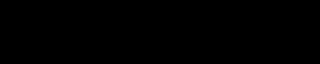

In [113]:
Image.new(mode='RGB', size=(320,64), color=0)

In [ ]:
path=os.path.join("../../../hdd/Dataset/Dataset/Train/9_7","000024.png")
img=Image.open(path)

In [ ]:
face_cropped=face_extraction(img,5)

In [ ]:
loss_func = torch.nn.MSELoss()


In [ ]:
import pandas as pd
training_data=pd.read_csv("training.csv")

from torch.utils.data import Dataset, DataLoader



In [ ]:
data_transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

In [ ]:
#
#train_set=AffectNetData("training.csv","AffectNet")
#valid_set=AffectNetData("validation.csv","AffectNet")

In [ ]:
#train_dataloader = DataLoader(train_data, batch_size=256
#                       , num_workers=0,shuffle=True)

#valid_dataloader = DataLoader(valid_data, batch_size=256
#                       , num_workers=0)

In [ ]:
#da

'3.pt'

In [ ]:
os.listdir("SpeedTest")